# 第六章 字符串操作

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

我们前面看到，Pandas 真的很善于处理日期。 它也善于处理字符串！ 我们从第 5 章回顾我们的天气数据。

In [12]:
weather_2012 = pd.read_csv('../data/weather_2012.csv',parse_dates=True,index_col='Date/Time')
#weather_2012 = pd.read_csv('../data/weather_2012.csv')
weather_2012[:5]

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


## 6.1 字符串操作
您会看到`Weather`列会显示每小时发生的天气的文字说明。 如果文本描述包含Snow，我们将假设它是下雪的。

pandas 提供了向量化的字符串函数，以便于对包含文本的列进行操作。 文档中有一些很好的例子。

In [22]:
weather_description = weather_2012['Weather']
is_snowing = weather_description.str.contains('Snow')
is_snowing[:5]

Date/Time
2012-01-01 00:00:00    False
2012-01-01 01:00:00    False
2012-01-01 02:00:00    False
2012-01-01 03:00:00    False
2012-01-01 04:00:00    False
Name: Weather, dtype: bool

<AxesSubplot:xlabel='Date/Time'>

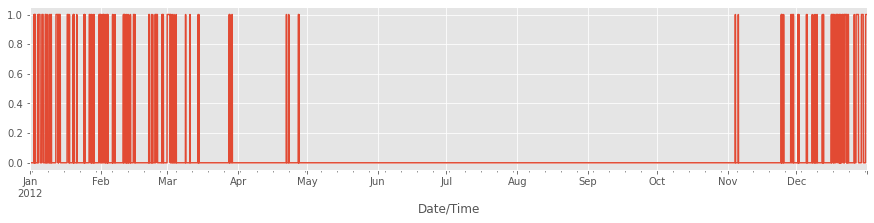

In [25]:
# 转换为图标
is_snowing=is_snowing.astype(float)
is_snowing.plot()

## 6.2 使用resample找到下雪最多的月份
如果我们想要每个月的温度中值，我们可以使用resample()方法，如下所示：

<AxesSubplot:xlabel='Date/Time'>

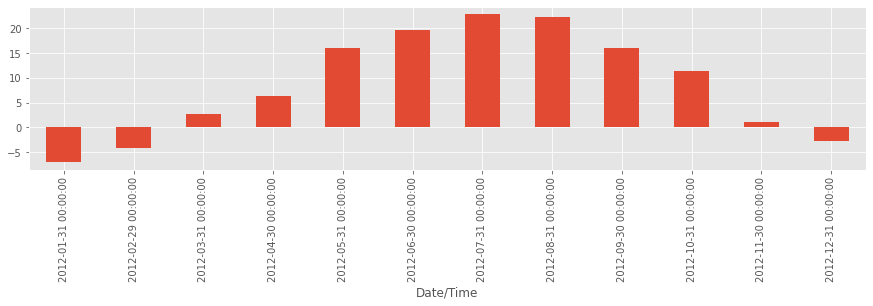

In [27]:
weather_2012['Temp (C)'].resample('M').apply(np.median).plot(kind='bar')

毫无奇怪，七月和八月是最暖和的。

所以我们可以将`is_snowing`转化为一堆 0 和 1，而不是True和False。

然后使用resample寻找每个月下雪的时间比例。

In [34]:
is_snowing.astype(float).resample('M').apply(np.mean)

Date/Time
2012-01-31    0.240591
2012-02-29    0.162356
2012-03-31    0.087366
2012-04-30    0.015278
2012-05-31    0.000000
2012-06-30    0.000000
2012-07-31    0.000000
2012-08-31    0.000000
2012-09-30    0.000000
2012-10-31    0.000000
2012-11-30    0.038889
2012-12-31    0.251344
Freq: M, Name: Weather, dtype: float64

<AxesSubplot:xlabel='Date/Time'>

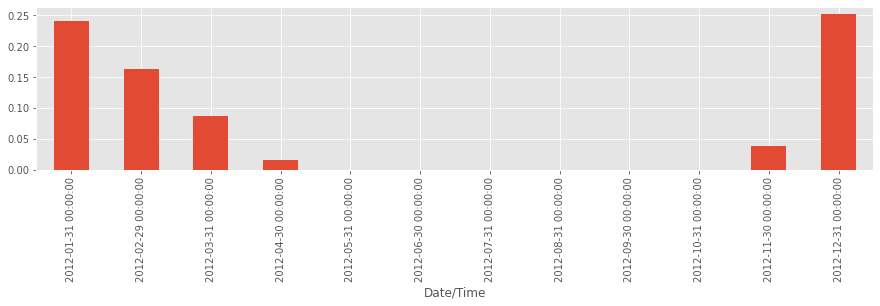

In [36]:
is_snowing.astype(float).resample('M').apply(np.mean).plot(kind='bar')

所以现在我们知道了！ 2012 年 12 月是下雪最多的一个月。 此外，这个图表暗示着我感觉到的东西 - 11 月突然开始下雪，然后慢慢变慢，需要很长时间停止，最后下雪的月份通常在 4 月或 5 月。

6.3 将温度和降雪绘制在一起
我们还可以将这两个统计（温度和降雪）合并为一个DataFrame，并将它们绘制在一起：

In [35]:
temperature = weather_2012['Temp (C)'].resample('M').apply(np.mean)
is_snowing = weather_2012['Weather'].str.contains('Snow')
snowiness = is_snowing.astype(float).resample('M').apply(np.mean)

temperature.name = "Temperature"
snowiness.name = "Snowiness"

我们再次使用`concat`，将两个统计连接为一个统计`DataFrame`

In [37]:
stats = pd.concat([temperature,snowiness],axis=1)
stats

,Temperature,Snowiness
Date/Time,,
2012-01-31,-7.371505,0.240591
2012-02-29,-4.225000,0.162356
2012-03-31,3.121237,0.087366
2012-04-30,7.009306,0.015278
2012-05-31,16.237769,0.000000
2012-06-30,20.134028,0.000000
2012-07-31,22.790054,0.000000
2012-08-31,22.279301,0.000000
2012-09-30,16.484444,0.000000


<AxesSubplot:xlabel='Date/Time'>

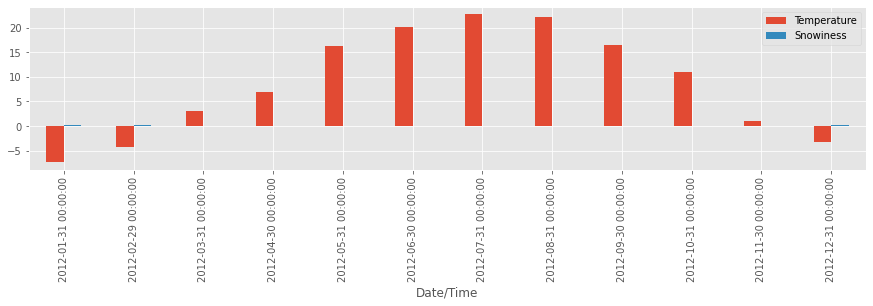

In [38]:
stats.plot(kind='bar')

这并不能正常工作，因为比例不对，我们可以在两个图表中分别绘制它们，这样会更好：

array([<AxesSubplot:title={'center':'Temperature'}, xlabel='Date/Time'>,
       <AxesSubplot:title={'center':'Snowiness'}, xlabel='Date/Time'>],
      dtype=object)

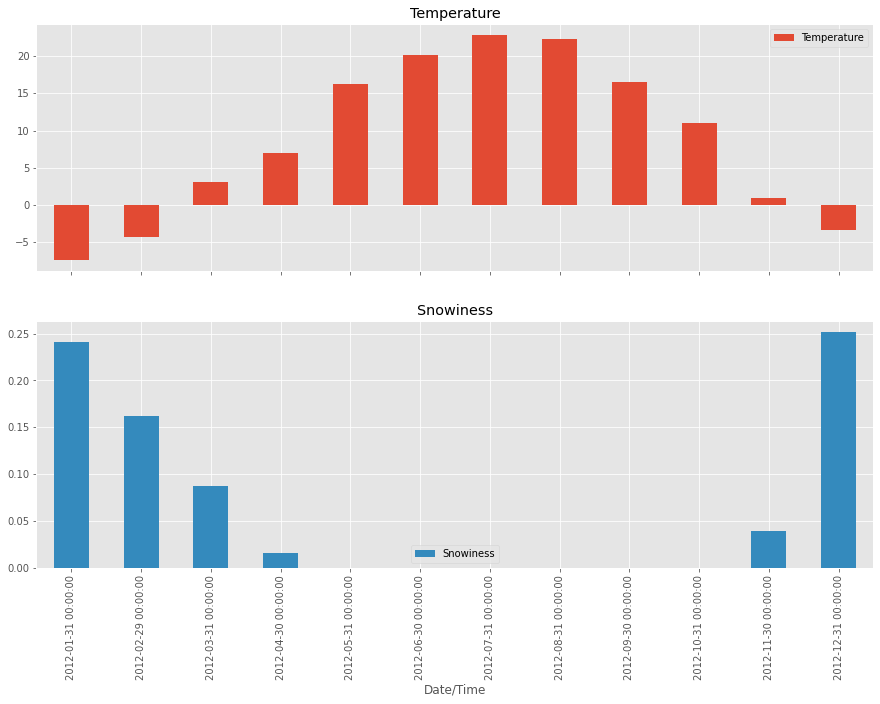

In [39]:
stats.plot(kind='bar',subplots=True,figsize=(15,10))